<a href="https://colab.research.google.com/github/ChahineBA/Jobrane/blob/main/Jobrane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries for web scraping, data manipulation, and OpenAI API access
pip install requests beautifulsoup4 openai pandas pillow ipython openai==0.28

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/74/0a/d4ce3c44bca8635bd29a2eab5aa181b654a734a29b263ca8efe013beea98/pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for numpy>=1.26.0 from https://files.pythonhosted.org/packages/ad/9c/4a93b8e395b755c53628573d75d7b21985d9a0f416e978d637084ccc8ec3/numpy-2.0.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     -------------------------------------- 60.9/60.9 kB 460.5 kB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.python

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Load Libraries:

# Requests: Library for making HTTP requests to fetch web page content
import requests

# BeautifulSoup: Library for parsing HTML and XML documents, useful for web scraping
from bs4 import BeautifulSoup

# OpenAI: Library for interacting with OpenAI's API to use models like GPT
import openai

# Pandas: Library for data manipulation and analysis, providing data structures like DataFrames
import pandas as pd

# JSON: Library for working with JSON data, commonly used for data interchange
import json

# PIL (Pillow): Library for opening, manipulating, and saving image files
from PIL import Image

# IO: Module for handling input and output operations, particularly for bytes
import io

# Base64: Module for encoding and decoding base64 data, often used for image data
import base64

# IPython.display: Module for displaying rich output in Jupyter notebooks
from IPython.display import display


In [ ]:
import requests

# Function to fetch HTML content from a URL with error handling
def fetch_html(url):
    try:
        # Send a GET request to the specified URL
        response = requests.get(url)

        # Raise an HTTPError for bad responses (e.g., 404, 500)
        response.raise_for_status()

        # Return the HTML content of the response
        return response.text
    except requests.exceptions.HTTPError as http_err:
        # Handle HTTP errors and print the error message
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.ConnectionError as conn_err:
        # Handle connection errors (e.g., network issues) and print the error message
        print(f"Connection error occurred: {conn_err}")
    except requests.exceptions.Timeout as timeout_err:
        # Handle timeout errors (request took too long) and print the error message
        print(f"Timeout error occurred: {timeout_err}")
    except requests.exceptions.RequestException as req_err:
        # Handle any other requests-related errors and print the error message
        print(f"An error occurred: {req_err}")


In [ ]:
# Function to extract text content from HTML without HTML tags
def extract_text(html_content):
    try:
        # Parse HTML content using BeautifulSoup with the 'html.parser' parser
        soup = BeautifulSoup(html_content, 'html.parser')

        # Extract text content from the parsed HTML, using a space as a separator and stripping whitespace
        text_content = soup.get_text(separator=" ", strip=True)

        # Return the extracted text content
        return text_content
    except Exception as e:
        # Handle any exceptions that occur during text extraction and print the error message
        print(f"An error occurred while extracting text: {e}")


In [ ]:
def extract_information_through_openai(source_url, name, location, start_date, end_date, description="N/A", time="N/A"):
    """
    This function will be called by the OpenAI model after it determines which parameters are useful.

    Parameters:
    name (str): The name information
    location (str): The location information.
    time (str): The time information.
    start_date (str): The start date information.
    end_date (str): The end date information.
    description (str): The description.

    Returns:
    dict: A dictionary containing all the provided information along with the source URL.
    """

    # Create a dictionary to hold the provided information
    info = {
        "name": name,               # Store the name
        "location": location,       # Store the location
        "time": time,               # Store the time
        "start_date": start_date,   # Store the start date
        "end_date": end_date,       # Store the end date
        "description": description,  # Store the description
        "source_url": source_url    # Store the source URL for reference
    }

    # Return the dictionary containing all the extracted information
    return info


In [ ]:
# Define the tools array containing function specifications
tools = [
    {
        "type": "function",  # Specify that this tool is a function
        "function": {
            "name": "extract_information_through_openai",  # Name of the function to be called
            "description": "This function is responsible for extracting useful information from any event.",  # Brief description of the function's purpose
            "parameters": {  # Define the parameters expected by the function
                "type": "object",  # Specify that the parameters will be an object
                "properties": {  # Define properties of the object
                    "source_url": {  # Parameter to hold the source URL
                        "type": "string",  # Data type of the parameter
                        "description": "The source URL from where the information is obtained."  # Description of the parameter
                    },
                    "name": {  # Parameter for the event name
                        "type": "string",  # Data type of the parameter
                        "description": "The name of the event."  # Description of the parameter
                    },
                    "location": {  # Parameter for the event location
                        "type": "string",  # Data type of the parameter
                        "description": "The location/place of the event, could be an entire street name, zone, room/hall number."  # Description of the parameter
                    },
                    "time": {  # Parameter for the event time
                        "type": "string",  # Data type of the parameter
                        "description": "The time of the event."  # Description of the parameter
                    },
                    "start_date": {  # Parameter for the event start date
                        "type": "string",  # Data type of the parameter
                        "description": "The start date of the event."  # Description of the parameter
                    },
                    "end_date": {  # Parameter for the event end date
                        "type": "string",  # Data type of the parameter
                        "description": "The end date of the event."  # Description of the parameter
                    },
                    "description": {  # Optional parameter for the event description
                        "type": "string",  # Data type of the parameter
                        "description": "The description of the event.",  # Description of the parameter
                        "default": "N/A"  # Default value for the parameter if not provided
                    }
                },
                "required": ["source_url", "name", "location", "time", "start_date", "end_date"]  # Required parameters for the function
            }
        }
    }
]


In [ ]:
# Set OpenAI API key
openai.api_key = ""
# Function to interact with OpenAI's GPT-3.5 model for chat completions with tools
def openai_platform_code(user_question):
    # Call OpenAI's ChatCompletion API with tools
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # Specify the model to use
        messages=[
            {'role': 'system', 'content': "You are a useful AI assistant."},  # Initial message
            {"role": "user", "content": user_question}  # User's question or prompt
        ],
        #functions=tools,  # Include the tools
        #function_call="auto"  # Let the model decide when to call functions
    )
    return response

In [ ]:
def extract_events(url,text):
    user_question = f"Extract events and relevant details (description,location, name of the event, start date, end date, time) from the following scraped data:\n\n{text}"

    # Call the function to interact with OpenAI and get response
    response = openai_platform_code(user_question)
    # Extract the relevant content from the response
    events_text = response['choices'][0]['message']['content']
    print("Raw LLM response:", events_text)  # Debugging statement
    events = []
    for event_str in events_text.split('\n\n'):
        event = {}
        event['source_url'] = url
        for line in event_str.split('\n'):
            if 'Event' in line:
                if '*' in line:
                    event['name'] = line.split('*', 1)[1].strip()
                else:
                    event['name'] = line.split(':', 1)[1].strip()

            elif 'Location' in line:
                if '*' in line:
                    event['location'] = line.split('*', 1)[1].strip()
                else:
                    event['location'] = line.split(':', 1)[1].strip()
            elif 'Description' in line:
                if '*' in line:
                    event['description'] = line.split('*', 1)[1].strip()
                else:
                    event['description'] = line.split(':', 1)[1].strip()
            elif 'Start Date' in line:
                if '*' in line:
                    event['start_date'] = line.split('*', 1)[1].strip()
                else:
                    event['start_date'] = line.split(':', 1)[1].strip()
            elif 'End Date' in line:
                if '*' in line:
                    event['end_date'] = line.split('*', 1)[1].strip()
                else:
                    event['end_date'] = line.split(':', 1)[1].strip()
            elif 'Time' in line:
                if '*' in line:
                    event['time'] = line.split('*', 1)[1].strip()
                else:
                    event['time'] = line.split(':', 1)[1].strip()
        # Check if the event dictionary is not empty
        if event:
                if 'location' not in event:
                    event['location'] = 'N/A'
                if 'description' not in event:
                    event['description'] = 'N/A'
                if 'time' not in event:
                    event['time'] = 'N/A'
                if 'end_date' not in event:
                    event['end_date'] = 'N/A'
                if 'start_date' not in event:
                    event['start_date'] = 'N/A'
                events.append(event)
    return events

In [ ]:
# Function to generate event image based on a description
def generate_event_image(name,description=""):
    """
    Generates an event image based on the given description using OpenAI's DALL-E model.

    Args:
    - description (str): Description or prompt for generating the event image.

    Returns:
    - PIL.Image.Image: Image object generated based on the description.
    """
    # Call OpenAI's Image API to generate an image based on the description
    response = openai.Image.create(
        prompt=f"Generate an image for an event: name:{name},description:{description}",  # Provide a prompt for generating the image
        n=1,                  # Number of images to generate (in this case, 1)
        size="512x512"        # Size of the generated image
    )

    # Retrieve the URL of the generated image from the API response
    image_url = response['data'][0]['url']

    # Fetch the image content from the generated URL
    image_response = requests.get(image_url)

    # Open the fetched image content using PIL's BytesIO for image manipulation
    return Image.open(io.BytesIO(image_response.content))


In [ ]:
def generate_image(all_events):
# Display images and event details
    for event in all_events:
    # Generate event image based on event description
        event['image'] = generate_event_image(event["name"],event['description'])
        # Display event image
        display(event['image'])

In [ ]:
websites = ["https://www.marhaba.qa/events/photo/page/",
            "https://www.qatarevents.co/events?page=",
            "https://educationcity.qa/events?page=",
            "https://qm.org.qa/en/calendar/?period=all-dates&page=",
            "https://www.eventbrite.com/d/qatar--doha/all-events/?page=",
            "https://www.iloveqatar.net/events/p",
            "https://events.q-tickets.com/qatar/events",
            "https://allevents.in/doha/all"
            ]

In [ ]:
from tqdm import tqdm  # Import tqdm for progress visualization

# Initialize an empty list to store all extracted events
all_events = []

# Iterate over each website in the list of websites with a progress bar
for website in tqdm(websites):
    print(website)  # Print the current website being processed
    p = 1  # Initialize page number for pagination handling

    # Check if the website URL contains 'page' or ends with 'p' for pagination
    if "page" in website or website.endswith("p"):
        # Loop through the first three pages of the current website
        while p < 4:
            # Construct the URL for the current page
            url = f"{website}{p}/"
            # Fetch the HTML content of the URL
            html = fetch_html(url)
            # Extract the text content from the HTML
            txt = extract_text(html)
            # Extract events from the text
            events = extract_events(url, txt)
            # Extend the all_events list with the newly extracted events
            all_events.extend(events)
            p += 1  # Increment the page number for the next iteration
    else:
        # If the website does not require pagination, fetch the HTML content directly
        html = fetch_html(website)
        # Extract the text content from the HTML
        txt = extract_text(html)
        # Extract events from the text
        events = extract_events(website, txt)
        # Extend the all_events list with the extracted events
        all_events.extend(events)

  0%|          | 0/8 [00:00<?, ?it/s]

https://www.marhaba.qa/events/photo/page/
Raw LLM response: Here are some extracted events with relevant details from the provided data:

1. Event: Rush Action Park at The Mall of Qatar
   - Location: The Mall of Qatar
   - Start Date: 6 September 2023
   - End Date: 5 September 2024
   - Time: 10:00 am - 10:00 pm

2. Event: Art Therapy Diploma
   - Location: Not specified
   - Start Date: 23 September 2023
   - End Date: 24 July 2024

3. Event: Arab Design Now Exhibition
   - Location: Not specified
   - Start Date: 24 February
   - End Date: 5 August

4. Event: “Connect-It. Visions to Connect the World” Exhibition
   - Location: Not specified
   - Start Date: 15 May
   - End Date: 14 September
   - Time: 9:00 am - 7:00 pm

5. Event: Ladies Day at Desert Falls Qatar
   - Location: Desert Falls Qatar
   - Start Date: 26 June
   - End Date: 25 September
   - Time: 3:00 pm - 9:00 pm

6. Event: Qatar Summer Trade Fair
   - Location: Not specified
   - Start Date: 15 July
   - End Date: 11

 12%|█▎        | 1/8 [00:11<01:22, 11.74s/it]

Raw LLM response: I'm sorry, but the provided text does not contain any specific events or relevant details that can be extracted. If you have a different set of data or more detailed information about events, please provide it, and I'll be happy to assist you in extracting the necessary details.
https://www.qatarevents.co/events?page=
Raw LLM response: Here are the extracted events with relevant details:

1. **Event:** MENA Karting Championship Nations Cup 2024
   - **Description:** Witness the top karting talents from across the region battle it out.
   - **Location:** Lusail International Circuit
   - **Start Date:** 17 Dec, 2024
   - **End Date:** 21 Dec, 2024
   - **Time:** 12:00 am - 12:00 am

2. **Event:** Coffee, Tea & Chocolate Festival 2024
   - **Description:** Celebrate the diverse flavors at the festival.
   - **Location:** Al Bidda Park
   - **Start Date:** 21 Nov, 2024
   - **End Date:** 30 Nov, 2024
   - **Time:** 03:00 pm - 11:00 pm

3. **Event:** SkillFest
   - **Desc

 25%|██▌       | 2/8 [00:34<01:50, 18.36s/it]

Raw LLM response: 1. Event: MENA Karting Championship Nations Cup 2024
   Description: Witness the top karting talents from across the region battle it out.
   Location: Lusail International Circuit, Qatar
   Start Date: 17 Dec, 2024
   End Date: 21 Dec, 2024
   Time: 12:00 am - 12:00 am
   Category: Sports

2. Event: Coffee, Tea & Chocolate Festival 2024
   Description: Come and celebrate the diverse flavors at the festival.
   Location: Al Bidda Park, Qatar
   Start Date: 21 Nov, 2024
   End Date: 30 Nov, 2024
   Time: 03:00 pm - 11:00 pm
   Category: Food & Dining

3. Event: SkillFest
   Description: Workshops and exhibitions highlighting Qatar's cultural and environmental heritage.
   Location: Multiple Locations in Qatar
   Start Date: 15 Jul, 2024
   End Date: 15 Aug, 2024
   Time: 11:00 am - 10:00 pm
   Category: Other

4. Event: Treasure Hunt Zone at Msheireb Galleria
   Description: Features riddles and puzzles in an escape room setup.
   Location: Msheireb Galleria, Msheireb 

 25%|██▌       | 2/8 [01:08<03:25, 34.28s/it]


KeyboardInterrupt: 

In [ ]:
all_events

[{'source_url': 'https://www.marhaba.qa/events/photo/page/1/',
  'location': 'N/A',
  'description': 'N/A',
  'time': 'N/A',
  'end_date': 'N/A',
  'start_date': 'N/A'},
 {'source_url': 'https://www.marhaba.qa/events/photo/page/1/',
  'name': '*Event:** Rush Action Park at The Mall of Qatar',
  'location': '*Location:** The Mall of Qatar',
  'start_date': '*Start Date:** 6 September 2023',
  'end_date': '*End Date:** 5 September 2024',
  'time': '*Time:** 10:00 am - 10:00 pm',
  'description': 'N/A'},
 {'source_url': 'https://www.marhaba.qa/events/photo/page/1/',
  'name': '*Event:** Art Therapy Diploma',
  'location': '*Location:** Not specified',
  'start_date': '*Start Date:** 23 September 2023',
  'end_date': '*End Date:** 24 July 2024',
  'description': 'N/A',
  'time': 'N/A'},
 {'source_url': 'https://www.marhaba.qa/events/photo/page/1/',
  'name': '*Event:** Qatar Superstock Championship 2024',
  'location': '*Location:** Not specified',
  'start_date': '*Start Date:** 11 Januar

In [ ]:
# Filter out dictionaries that contain only the key 'source_url'
# Filter out items without 'name'
filtered_events = [event for event in all_events if 'name' in event]
len(filtered_events)
# ================================== Removing Duplicates ===============================================

# Create a set to track seen names
#seen_names = set()

# Create a list to hold the unique dictionaries
#unique_data = []

#for item in cleaned_data:
 #   name = item.get('name')
 #   if name and name not in seen_names:
#        seen_names.add(name)
 #       unique_data.append(item)
#print(unique_data)
#len(unique_data)

105

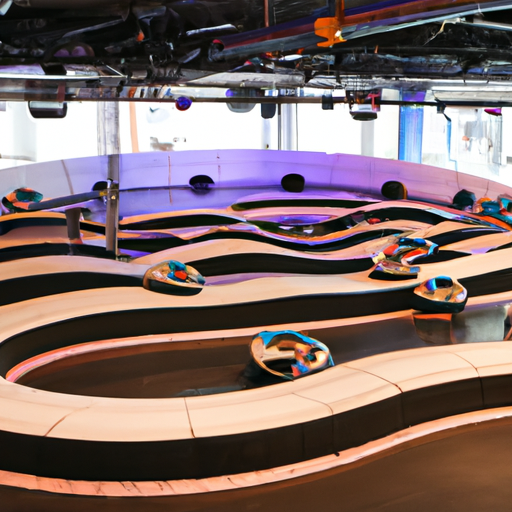

KeyboardInterrupt: 

In [ ]:
generate_image(filtered_events)

In [ ]:
# File path where you want to save the JSON file
file_path = 'data.json'

# Writing data to JSON file
with open(file_path, 'w') as file:
    json.dump(filtered_events, file, indent=4)

print(f"Data has been saved to {file_path}")